# Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("bank_marketing_part1_Data.csv")

# Checking the data

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6E3108>,
      dtype=object)

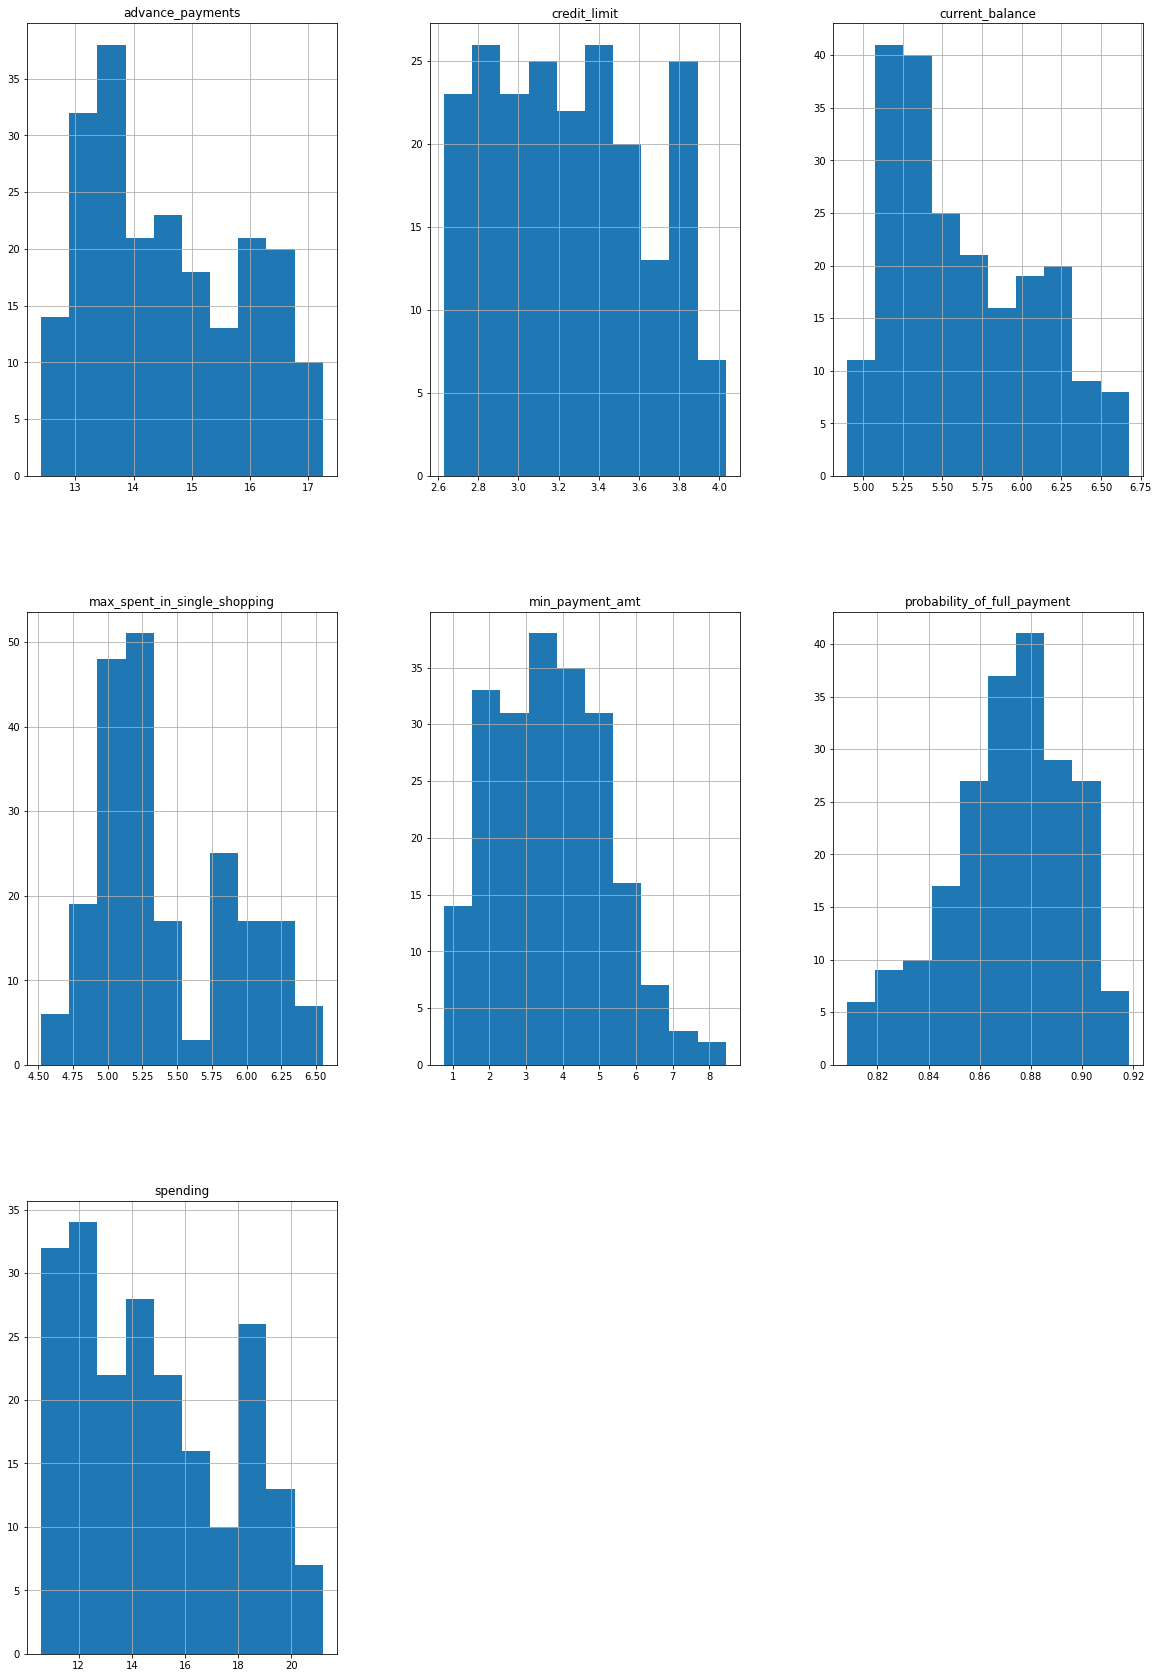

In [4]:
df.hist(figsize=(20,30))

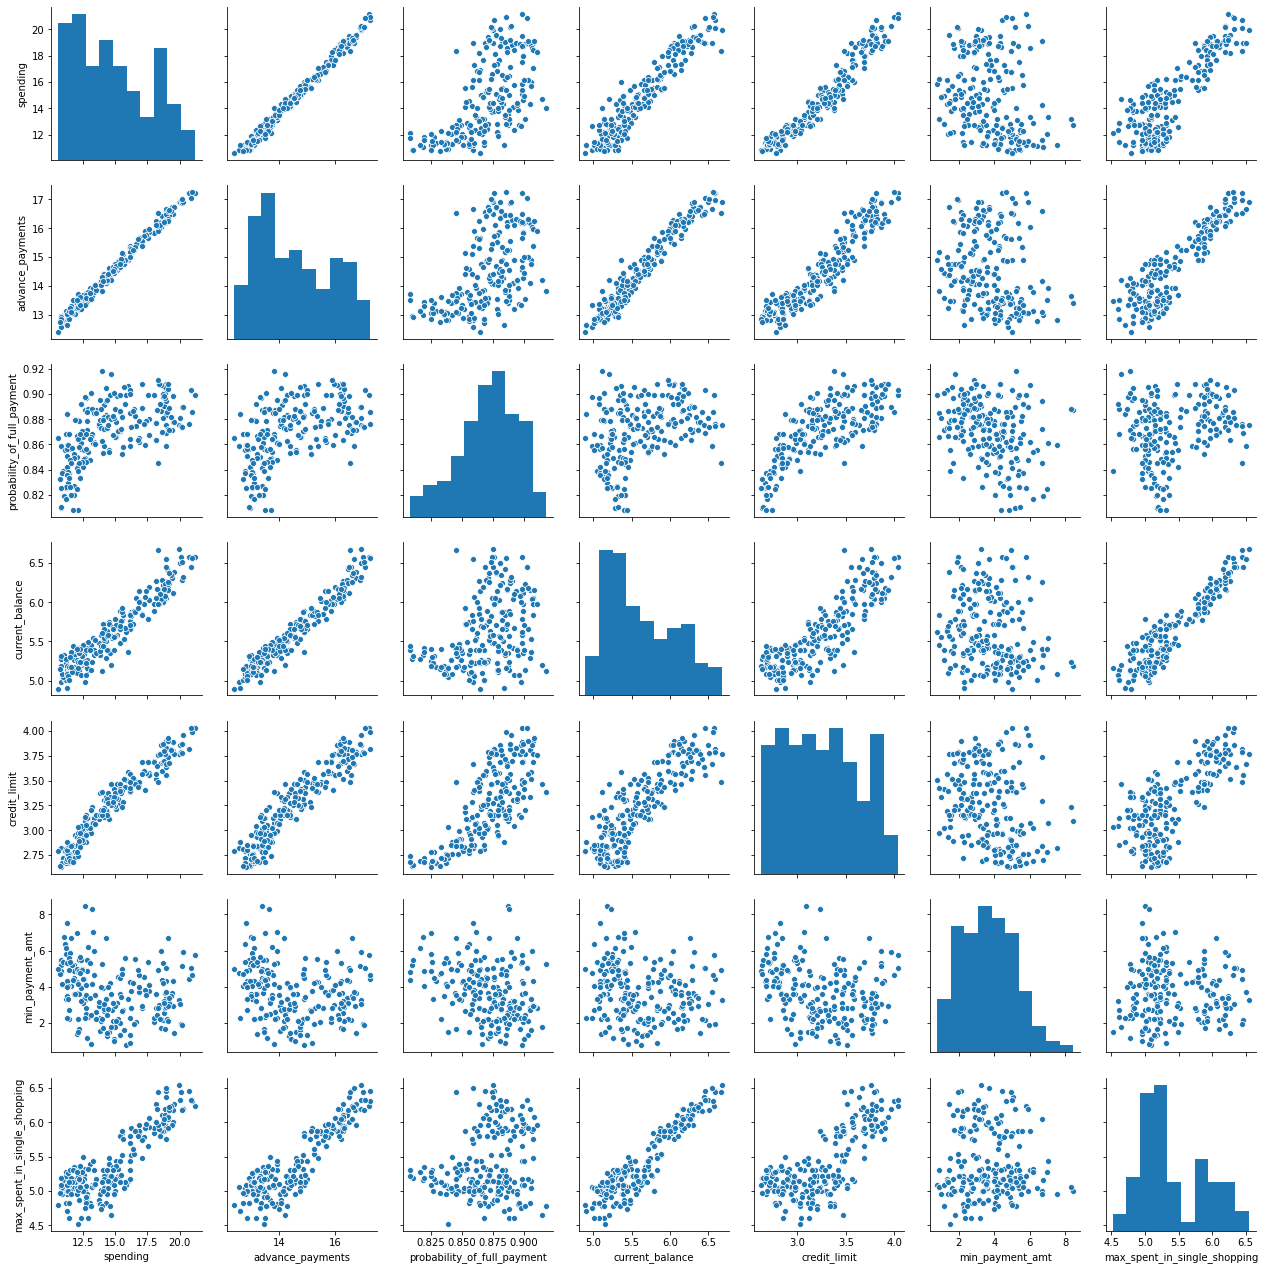

In [5]:
sns.pairplot(df)
plt.show()

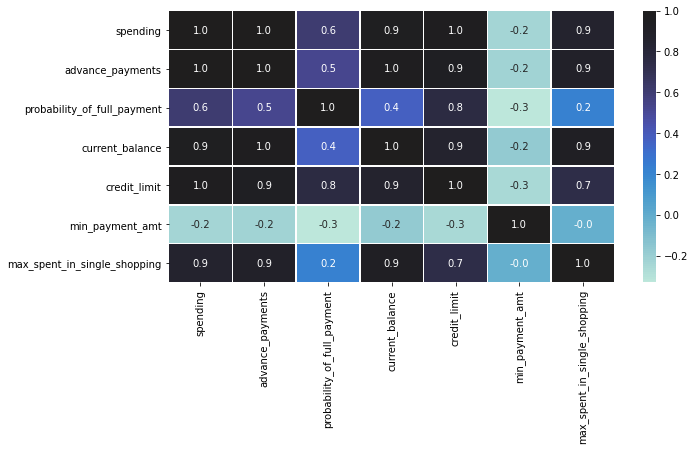

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

# Checking the Summary Statistic

In [6]:
df.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


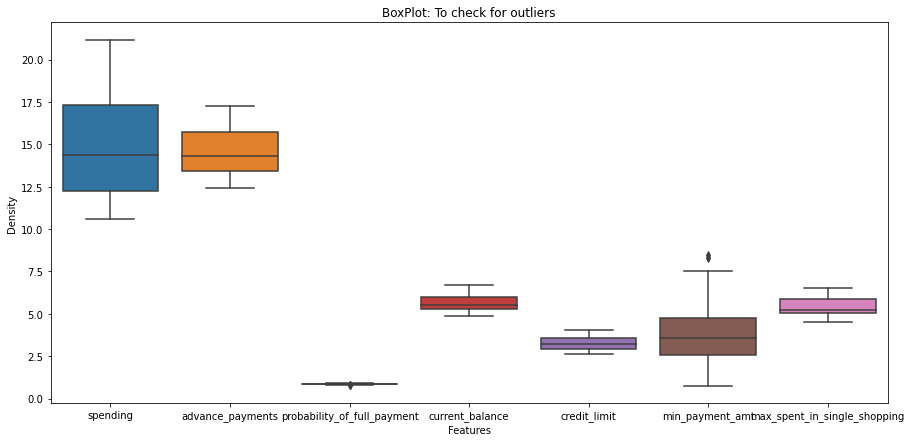

In [9]:
plt.figure(figsize=(15,7));
sns.boxplot(data=df);
plt.title('BoxPlot: To check for outliers');
plt.xlabel('Features');
plt.ylabel('Density');

In [10]:
def inter_quartile_range(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    ul = Q3 + 1.5*IQR
    ll = Q1 - 1.5*IQR
    return ll, ul

In [11]:
columns = [i for i in df.columns]
for i in columns:
    ll, ul = inter_quartile_range(df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])
    df[i] = np.where(df[i] > ul, ul, df[i])

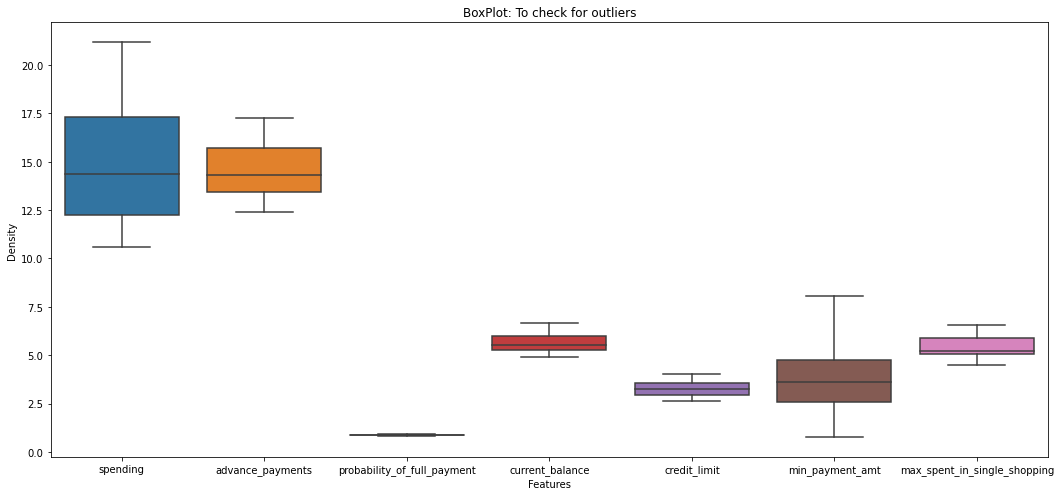

In [12]:

plt.figure(figsize=(15,7));
sns.boxplot(data=df);
plt.title('BoxPlot: To check for outliers');
plt.xlabel('Features');
plt.ylabel('Density');
plt.tight_layout();

In [13]:

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=list(df))

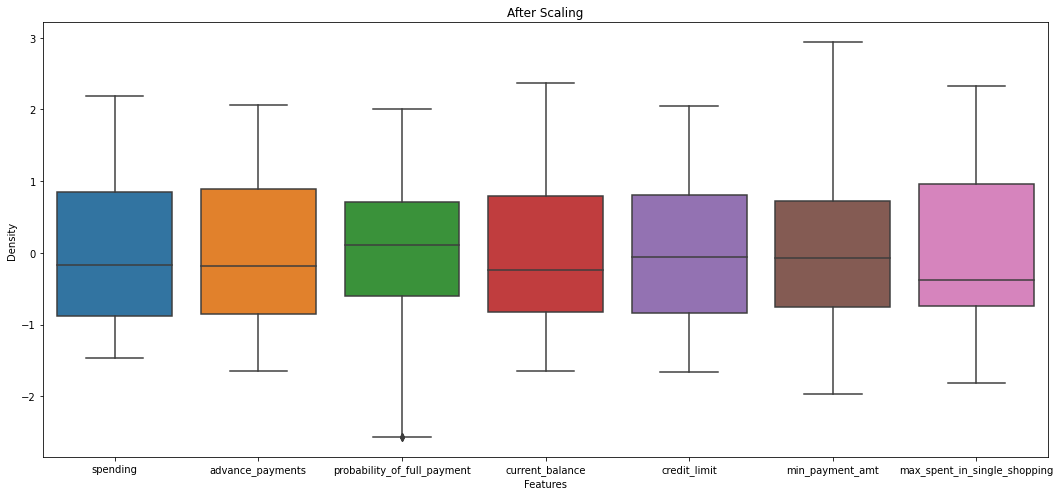

In [14]:

plt.figure(figsize=(15,7));
sns.boxplot(data=scaled_data);
plt.title('After Scaling');
plt.xlabel('Features');
plt.ylabel('Density');
plt.tight_layout();

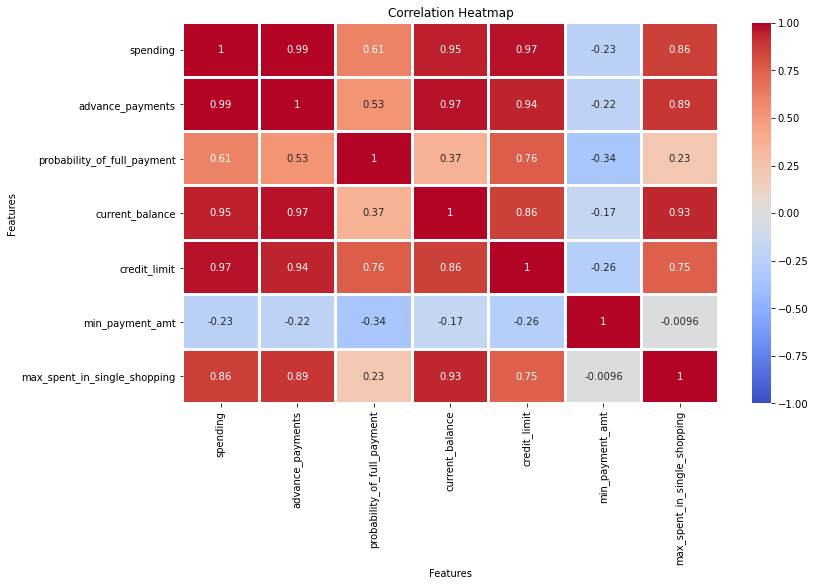

In [15]:
plt.figure(figsize=(12,7));
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', lw=2, annot=True);
plt.title('Correlation Heatmap');
plt.xlabel('Features');
plt.ylabel('Features');

# Creating the Dendrogram
### Importing dendrogram and linkage module

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing average linkage method

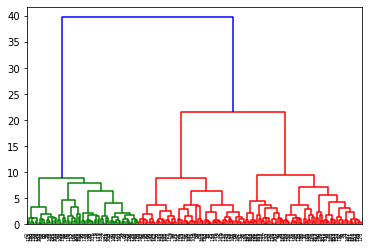

In [17]:
ward_linkage = linkage(scaled_data, method='ward', metric='euclidean')
dend = dendrogram(ward_linkage)

### Cutting the Dendrogram with suitable clusters

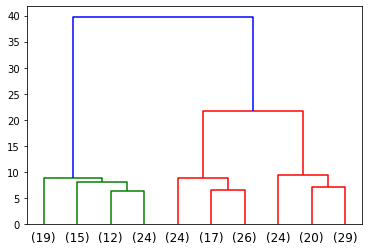

In [19]:
dend = dendrogram(ward_linkage,
                 truncate_mode='lastp',
                 p = 10
                 )

# Importing fcluster module to create clusters

In [20]:
from scipy.cluster.hierarchy import fcluster

In [42]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(ward_linkage, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

Appending clusters to original dataset

In [43]:
df['clusters'] = clusters

In [44]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,1


### Cluster Frequency

In [45]:
df.clusters.value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

# Cluster Profiles

In [46]:
aggdata=df.iloc[:,1:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,
1,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.766214,0.864338,5.363714,3.045593,3.726353,5.103421,140


- Cluster 1: Tier 1 colleges (Top Colleges)
- Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
- Cluster 3: Tier 2 colleges (Medium performing colleges)

# Using Agglomerative Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df.iloc[:,1:6])
print(Cluster_agglo)

[1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0]


In [48]:
df["Agglo_CLusters"]=Cluster_agglo

In [49]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Agglo_CLusters',
       'cluster'],
      dtype='object')

In [50]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,cluster,Freq
Agglo_CLusters,,,,,,,,,,
0,13.152817,13.793592,0.865003,5.371880,3.055958,3.673285,5.114331,1.971831,2.471831,142
1,18.386471,16.158235,0.883600,6.164485,3.681779,3.747412,6.021471,1.029412,1.058824,68


In [52]:
agglo_data.groupby('cluster').mean().T

cluster,1,2
spending,18.371429,13.085571
advance_payments,16.145429,13.766214
probability_of_full_payment,0.884400,0.864338
current_balance,6.158171,5.363714
credit_limit,3.684629,3.045593
min_payment_amt,3.639157,3.726353
max_spent_in_single_shopping,6.017371,5.103421
clusters,1.000000,2.000000
Agglo_CLusters,0.942857,0.014286


In [51]:
agglo_data = df
agglo_data['cluster'] = clusters
agglo_data.to_csv('bank_marketing_using_agglomerative_clustering.csv', index=False)

# Recommendations
1. For companies hiring, go to colleges for Placements are Tier 1 colleges, followed by Tier 2 colleges
2. For companies providing Training program to staffs and students, go to colleges are Tier 2 and Tier 3 Colleges, since Tier 1 is comparitively performing better.
3. Tier 3 colleges will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students
4. Students looking to enroll in a college, can give priority to Tier 1 over Tier 2 and 3 colleges 

# Saving the Cluster Profiles in a csv file

In [27]:
#aggdata.to_csv('enggdata_hc.csv')